In [1]:
import pandas as pd
from time import time
from sklearn import preprocessing
import pickle


In [2]:
def save_obj(obj, name ):
    with open('../DistributionDictionary/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

#数理统计方法，按5%区间进行数理统计
def statistics(dataset, feature_index):
    intervals = {'{0}-{1}'.format(5 * x, 5 * (x+1) ): 0 for x in range(20)}
    for _ in dataset[:,feature_index]:
        for interval in intervals:
            start, end = tuple(interval.split('-'))
            if int(start) <= _*100 <= int(end):
                intervals[interval] += 1
    return intervals

def read_csv(dataroot):
    df=pd.read_csv(dataroot,header=0,low_memory=False)   
    pd.set_option('mode.use_inf_as_na', True) # convert inf to nan
    df['Flow Bytes/s']=df['Flow Bytes/s'].astype('float64')
    df[' Flow Packets/s']=df[' Flow Packets/s'].astype('float64')
    df['Flow Bytes/s'].fillna(df['Flow Bytes/s'].mean(),inplace=True)
    df[' Flow Packets/s'].fillna(df[' Flow Packets/s'].mean(),inplace=True)
    return df

#特征选择
# def feature_selection_distribute(dataset):
#     return dataset[[
#         'Bwd Packet Length Max',' Bwd Packet Length Min', ' Bwd Packet Length Std',
#         ' Flow IAT Mean',' Flow IAT Min', ' Fwd IAT Min', ' Bwd Packets/s', ' Min Packet Length',
#         ' Init_Win_bytes_backward', ' act_data_pkt_fwd', ' Label'
#     ]]
#特征选取
def feature_selection_distribute(dataset):
    return dataset[[
        'Total Length of Fwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Mean', 
        ' Bwd Packet Length Mean', ' Packet Length Mean', ' Packet Length Std', ' Average Packet Size', 
        ' Subflow Fwd Bytes', 'Init_Win_bytes_forward', ' Init_Win_bytes_backward', 
        ' Label'
    ]]


In [3]:
##统计
df_1 = read_csv("../MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df_1 = feature_selection_distribute(df_1)
print("_________________________")
print(df_1.shape)
df_1.loc[:,' Label'].value_counts()

_________________________
(225745, 11)


DDoS      128027
BENIGN     97718
Name:  Label, dtype: int64

In [4]:
df_2 = read_csv("../MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df_2 = feature_selection_distribute(df_2)
print("_________________________")
print(df_2.shape)
df_2.loc[:,' Label'].value_counts()

_________________________
(286467, 11)


PortScan    158930
BENIGN      127537
Name:  Label, dtype: int64

In [5]:
df_3 = read_csv("../MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df_3 = feature_selection_distribute(df_3)
print("_________________________")
print(df_3.shape)
df_3.loc[:,' Label'].value_counts()

_________________________
(191033, 11)


BENIGN    189067
Bot         1966
Name:  Label, dtype: int64

In [6]:
df_4 = read_csv("../MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
df_4 = feature_selection_distribute(df_4)
print("_________________________")
print(df_4.shape)
df_4.loc[:,' Label'].value_counts()

_________________________
(529918, 11)


BENIGN    529918
Name:  Label, dtype: int64

In [7]:
df_5 = read_csv("../MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df_5 = feature_selection_distribute(df_5)
print("_________________________")
print(df_5.shape)
df_5.loc[:,' Label'].value_counts()

_________________________
(288602, 11)


BENIGN          288566
Infiltration        36
Name:  Label, dtype: int64

In [8]:
df_6 = read_csv("../MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df_6 = feature_selection_distribute(df_6)
print("_________________________")
print(df_6.shape)
df_6.loc[:,' Label'].value_counts()

_________________________
(170366, 11)


BENIGN                        168186
Web Attack � Brute Force        1507
Web Attack � XSS                 652
Web Attack � Sql Injection        21
Name:  Label, dtype: int64

In [9]:
df_7_1 = read_csv("../MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
df_7_2 = read_csv("../MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
df_7_1 = feature_selection_distribute(df_7_1)
df_7_2 = feature_selection_distribute(df_7_2)
print("_________________________")
print(df_7_1.shape)
df_7_1.loc[:,' Label'].value_counts()

_________________________
(445909, 11)


BENIGN         432074
FTP-Patator      7938
SSH-Patator      5897
Name:  Label, dtype: int64

In [10]:
df_8 = read_csv("../MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")
df_8 = feature_selection_distribute(df_8)
print("_________________________")
print(df_8.shape)
df_8.loc[:,' Label'].value_counts()

_________________________
(692703, 11)


BENIGN              440031
DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name:  Label, dtype: int64

In [11]:
#需要处理的特征数
feature_numbers = df_1.shape[1] - 1

In [12]:
##收集DDoS的distribution dictionary
print("Collecting DDoS distribution dictionary")
df_1[' Label'] = df_1[' Label'].apply(lambda x: 0 if 'BENIGN' in x else 1)
df_1_DDoS = df_1.drop(df_1[df_1[' Label'] == 0].index)

#Feature scaling
scaler = preprocessing.MinMaxScaler()
DDosMatrix=scaler.fit_transform(df_1_DDoS.values)

#DDos的分布统计字典创建并存储至文件
DDoS_Distribution_set = {}
for i in range(feature_numbers):
    StatisticObj = statistics(DDosMatrix, i)
    DDoS_Distribution_set[str(i)] = StatisticObj

save_obj(DDoS_Distribution_set, "DDoS_Distribution_set")

print("End of collecting DDoS distribution dictionary")
print(DDosMatrix.shape)
print(DDoS_Distribution_set)
#del df_1_DDoS, DDosMatrix

End of collecting DDoS distribution dictionary
(128027, 11)
{'0': {'0-5': 52, '5-10': 99, '10-15': 0, '15-20': 106, '20-25': 1366, '25-30': 79754, '30-35': 0, '35-40': 22320, '40-45': 1147, '45-50': 19, '50-55': 0, '55-60': 38, '60-65': 1006, '65-70': 0, '70-75': 18059, '75-80': 0, '80-85': 4057, '85-90': 0, '90-95': 3, '95-100': 1}, '1': {'0-5': 46660, '5-10': 0, '10-15': 0, '15-20': 0, '20-25': 0, '25-30': 0, '30-35': 0, '35-40': 0, '40-45': 0, '45-50': 0, '50-55': 0, '55-60': 0, '60-65': 0, '65-70': 0, '70-75': 0, '75-80': 0, '80-85': 0, '85-90': 0, '90-95': 0, '95-100': 81367}, '2': {'0-5': 5, '5-10': 1, '10-15': 12, '15-20': 0, '20-25': 13, '25-30': 5, '30-35': 0, '35-40': 0, '40-45': 46624, '45-50': 180, '50-55': 9, '55-60': 23114, '60-65': 35, '65-70': 12, '70-75': 37, '75-80': 0, '80-85': 56619, '85-90': 0, '90-95': 0, '95-100': 1361}, '3': {'0-5': 46627, '5-10': 0, '10-15': 0, '15-20': 0, '20-25': 123, '25-30': 2873, '30-35': 25409, '35-40': 11746, '40-45': 32057, '45-50': 122

In [13]:
##收集PortScan的distribution dictionary
print("Collecting PortScan distribution dictionary")
df_2[' Label'] = df_2[' Label'].apply(lambda x: 0 if 'BENIGN' in x else 1)
df_2_PortScan = df_2.drop(df_2[df_2[' Label'] == 0].index)

#Feature scaling
scaler = preprocessing.MinMaxScaler()
PortScanMatrix=scaler.fit_transform(df_2_PortScan.values)

#DDos的分布统计字典创建并存储至文件
PortScan_Distribution_set = {}
for i in range(feature_numbers):
    StatisticObj = statistics(PortScanMatrix, i)
    PortScan_Distribution_set[str(i)] = StatisticObj

save_obj(PortScan_Distribution_set, "PortScan_Distribution_set")

print("End of collecting PortScan distribution dictionary")
print(PortScanMatrix.shape)
print(PortScan_Distribution_set)
#del df_2_PortScan, PortScanMatrix

End of collecting PortScan distribution dictionary
(158930, 11)
{'0': {'0-5': 158888, '5-10': 0, '10-15': 37, '15-20': 0, '20-25': 1, '25-30': 0, '30-35': 0, '35-40': 0, '40-45': 0, '45-50': 3, '50-55': 0, '55-60': 0, '60-65': 0, '65-70': 0, '70-75': 0, '75-80': 0, '80-85': 0, '85-90': 0, '90-95': 0, '95-100': 1}, '1': {'0-5': 158859, '5-10': 0, '10-15': 1, '15-20': 28, '20-25': 0, '25-30': 0, '30-35': 0, '35-40': 0, '40-45': 37, '45-50': 0, '50-55': 0, '55-60': 0, '60-65': 0, '65-70': 0, '70-75': 0, '75-80': 0, '80-85': 1, '85-90': 3, '90-95': 0, '95-100': 1}, '2': {'0-5': 158859, '5-10': 28, '10-15': 0, '15-20': 0, '20-25': 37, '25-30': 0, '30-35': 1, '35-40': 1, '40-45': 0, '45-50': 0, '50-55': 0, '55-60': 0, '60-65': 0, '65-70': 0, '70-75': 0, '75-80': 3, '80-85': 0, '85-90': 0, '90-95': 0, '95-100': 1}, '3': {'0-5': 158841, '5-10': 0, '10-15': 3, '15-20': 0, '20-25': 0, '25-30': 0, '30-35': 0, '35-40': 0, '40-45': 1, '45-50': 0, '50-55': 1, '55-60': 0, '60-65': 0, '65-70': 0, '70-

In [14]:
##收集Bot的distribution dictionary
print("Collecting Bot distribution dictionary")
df_3[' Label'] = df_3[' Label'].apply(lambda x: 0 if 'BENIGN' in x else 1)
df_3_Bot = df_3.drop(df_3[df_3[' Label'] == 0].index)

#Feature scaling
scaler = preprocessing.MinMaxScaler()
BotMatrix=scaler.fit_transform(df_3_Bot.values)

#DDos的分布统计字典创建并存储至文件
Bot_Distribution_set = {}
for i in range(feature_numbers):
    StatisticObj = statistics(BotMatrix, i)
    Bot_Distribution_set[str(i)] = StatisticObj

save_obj(Bot_Distribution_set, "Bot_Distribution_set")

print("End of collecting Bot distribution dictionary")
print(BotMatrix.shape)
print(Bot_Distribution_set)
#del df_3_Bot, BotMatrix

End of collecting Bot distribution dictionary
(1966, 11)
{'0': {'0-5': 1922, '5-10': 0, '10-15': 0, '15-20': 0, '20-25': 2, '25-30': 2, '30-35': 5, '35-40': 7, '40-45': 1, '45-50': 6, '50-55': 6, '55-60': 1, '60-65': 1, '65-70': 1, '70-75': 3, '75-80': 1, '80-85': 0, '85-90': 1, '90-95': 1, '95-100': 6}, '1': {'0-5': 1914, '5-10': 7, '10-15': 1, '15-20': 0, '20-25': 7, '25-30': 8, '30-35': 4, '35-40': 0, '40-45': 1, '45-50': 4, '50-55': 4, '55-60': 4, '60-65': 0, '65-70': 4, '70-75': 0, '75-80': 0, '80-85': 8, '85-90': 5, '90-95': 3, '95-100': 2}, '2': {'0-5': 1914, '5-10': 6, '10-15': 1, '15-20': 1, '20-25': 0, '25-30': 0, '30-35': 0, '35-40': 1, '40-45': 0, '45-50': 6, '50-55': 6, '55-60': 4, '60-65': 6, '65-70': 5, '70-75': 3, '75-80': 3, '80-85': 1, '85-90': 4, '90-95': 2, '95-100': 3}, '3': {'0-5': 2, '5-10': 0, '10-15': 1226, '15-20': 28, '20-25': 15, '25-30': 1, '30-35': 0, '35-40': 0, '40-45': 0, '45-50': 0, '50-55': 0, '55-60': 1, '60-65': 1, '65-70': 1, '70-75': 0, '75-80': 2

In [15]:
##收集Web的distribution dictionary
print("Collecting Web distribution dictionary")
df_6[' Label'] = df_6[' Label'].apply(lambda x: 0 if 'BENIGN' in x else 1)
df_6_Web = df_6.drop(df_6[df_6[' Label'] == 0].index)

#Feature scaling
scaler = preprocessing.MinMaxScaler()
WebMatrix=scaler.fit_transform(df_6_Web.values)

#Web的分布统计字典创建并存储至文件
Web_Distribution_set = {}
for i in range(feature_numbers):
    StatisticObj = statistics(WebMatrix, i)
    Web_Distribution_set[str(i)] = StatisticObj

save_obj(Web_Distribution_set, "Web_Distribution_set")

print("End of collecting Web distribution dictionary")
print(WebMatrix.shape)
print(Web_Distribution_set)
#del df_6_Web, WebMatrix

End of collecting Web distribution dictionary
(2180, 11)
{'0': {'0-5': 2088, '5-10': 3, '10-15': 1, '15-20': 0, '20-25': 0, '25-30': 0, '30-35': 1, '35-40': 0, '40-45': 0, '45-50': 0, '50-55': 0, '55-60': 0, '60-65': 0, '65-70': 0, '70-75': 0, '75-80': 2, '80-85': 0, '85-90': 70, '90-95': 0, '95-100': 15}, '1': {'0-5': 1993, '5-10': 0, '10-15': 0, '15-20': 0, '20-25': 0, '25-30': 0, '30-35': 0, '35-40': 0, '40-45': 0, '45-50': 0, '50-55': 0, '55-60': 3, '60-65': 37, '65-70': 2, '70-75': 2, '75-80': 1, '80-85': 0, '85-90': 4, '90-95': 8, '95-100': 130}, '2': {'0-5': 1993, '5-10': 0, '10-15': 0, '15-20': 0, '20-25': 0, '25-30': 0, '30-35': 1, '35-40': 38, '40-45': 3, '45-50': 5, '50-55': 3, '55-60': 4, '60-65': 39, '65-70': 1, '70-75': 2, '75-80': 2, '80-85': 1, '85-90': 72, '90-95': 0, '95-100': 16}, '3': {'0-5': 1993, '5-10': 73, '10-15': 1, '15-20': 2, '20-25': 3, '25-30': 6, '30-35': 0, '35-40': 72, '40-45': 1, '45-50': 3, '50-55': 0, '55-60': 3, '60-65': 2, '65-70': 3, '70-75': 1, '

In [16]:
##收集SSH-Patator和FTP-Patator的distribution dictionary
print("Collecting SSH-Patator and FTP-Patator distribution dictionary")
df_7_1[' Label'] = df_7_1[' Label'].apply(lambda x: 1 if 'SSH-Patator' in x else 0)
df_7_2[' Label'] = df_7_2[' Label'].apply(lambda x: 1 if 'FTP-Patator' in x else 0)

df_7_SSH = df_7_1.drop(df_7_1[df_7_1[' Label'] == 0].index)
df_7_FTP = df_7_2.drop(df_7_2[df_7_2[' Label'] == 0].index)

#Feature scaling
scaler = preprocessing.MinMaxScaler()
SSHMatrix=scaler.fit_transform(df_7_SSH.values)
FTPMatrix=scaler.fit_transform(df_7_FTP.values)

#SSH,FTP的分布统计字典创建并存储至文件
SSH_Distribution_set = {}
FTP_Distribution_set = {}

for i in range(feature_numbers):
    StatisticObj1 = statistics(SSHMatrix, i)
    StatisticObj2 = statistics(FTPMatrix, i)
    SSH_Distribution_set[str(i)] = StatisticObj1
    FTP_Distribution_set[str(i)] = StatisticObj2

save_obj(SSH_Distribution_set, "SSH_Distribution_set")
save_obj(FTP_Distribution_set, "FTP_Distribution_set")


print("End of collecting SSH and FTP distribution dictionary")
print(SSHMatrix.shape)
print(FTPMatrix.shape)
print(SSH_Distribution_set)
print(FTP_Distribution_set)

#del df_7_SSH,df_7_FTP, SSHMatrix, FTPMatrix


End of collecting SSH and FTP distribution dictionary
(5897, 11)
(7938, 11)
{'0': {'0-5': 2937, '5-10': 0, '10-15': 0, '15-20': 0, '20-25': 0, '25-30': 12, '30-35': 4, '35-40': 6, '40-45': 6, '45-50': 3, '50-55': 2881, '55-60': 25, '60-65': 8, '65-70': 5, '70-75': 8, '75-80': 0, '80-85': 0, '85-90': 1, '90-95': 0, '95-100': 1}, '1': {'0-5': 2937, '5-10': 0, '10-15': 0, '15-20': 0, '20-25': 0, '25-30': 0, '30-35': 0, '35-40': 0, '40-45': 2955, '45-50': 2, '50-55': 0, '55-60': 0, '60-65': 1, '65-70': 0, '70-75': 0, '75-80': 0, '80-85': 0, '85-90': 0, '90-95': 0, '95-100': 2}, '2': {'0-5': 2927, '5-10': 8, '10-15': 2, '15-20': 0, '20-25': 0, '25-30': 0, '30-35': 0, '35-40': 2, '40-45': 20, '45-50': 81, '50-55': 2266, '55-60': 285, '60-65': 298, '65-70': 5, '70-75': 2, '75-80': 0, '80-85': 0, '85-90': 0, '90-95': 0, '95-100': 1}, '3': {'0-5': 2937, '5-10': 0, '10-15': 0, '15-20': 0, '20-25': 0, '25-30': 0, '30-35': 4, '35-40': 19, '40-45': 2889, '45-50': 3, '50-55': 5, '55-60': 6, '60-65':

In [17]:
##收集DoS的distribution dictionary
print("Collecting DoS distribution dictionary")
df_8[' Label'] = df_8[' Label'].apply(lambda x: 0 if 'BENIGN' in x else 1)
df_8_DoS = df_8.drop(df_8[df_8[' Label'] == 0].index)

#Feature scaling
scaler = preprocessing.MinMaxScaler()
DoSMatrix=scaler.fit_transform(df_8_DoS.values)

#Web的分布统计字典创建并存储至文件
DoS_Distribution_set = {}
for i in range(feature_numbers):
    StatisticObj = statistics(DoSMatrix, i)
    DoS_Distribution_set[str(i)] = StatisticObj

save_obj(DoS_Distribution_set, "DoS_Distribution_set")

print("End of collecting DoS distribution dictionary")
print(DoSMatrix.shape)
print(DoS_Distribution_set)
#del df_8_DoS, DoSMatrix

End of collecting DoS distribution dictionary
(252672, 11)
{'0': {'0-5': 244576, '5-10': 5711, '10-15': 2048, '15-20': 109, '20-25': 92, '25-30': 119, '30-35': 6, '35-40': 2, '40-45': 1, '45-50': 0, '50-55': 0, '55-60': 3, '60-65': 0, '65-70': 4, '70-75': 0, '75-80': 0, '80-85': 0, '85-90': 0, '90-95': 0, '95-100': 1}, '1': {'0-5': 89755, '5-10': 162105, '10-15': 525, '15-20': 0, '20-25': 84, '25-30': 84, '30-35': 194, '35-40': 0, '40-45': 0, '45-50': 0, '50-55': 0, '55-60': 0, '60-65': 0, '65-70': 0, '70-75': 3, '75-80': 3, '80-85': 0, '85-90': 0, '90-95': 0, '95-100': 6}, '2': {'0-5': 226093, '5-10': 24342, '10-15': 1450, '15-20': 436, '20-25': 29, '25-30': 45, '30-35': 0, '35-40': 1, '40-45': 0, '45-50': 0, '50-55': 1, '55-60': 0, '60-65': 0, '65-70': 0, '70-75': 82, '75-80': 0, '80-85': 0, '85-90': 0, '90-95': 0, '95-100': 193}, '3': {'0-5': 89901, '5-10': 225, '10-15': 39, '15-20': 765, '20-25': 1708, '25-30': 231, '30-35': 7703, '35-40': 45424, '40-45': 76841, '45-50': 1, '50-55'

In [18]:
##收集Benign的distribution dictionary

df_4[' Label'] = df_4[' Label'].apply(lambda x: 0 if 'BENIGN' in x else 1)
#Feature scaling
scaler = preprocessing.MinMaxScaler()
BenignMatrix=scaler.fit_transform(df_4.values)

#Web的分布统计字典创建并存储至文件
Benign_Distribution_set = {}
for i in range(feature_numbers):
    StatisticObj = statistics(BenignMatrix, i)
    Benign_Distribution_set[str(i)] = StatisticObj

save_obj(Benign_Distribution_set, "Benign_Distribution_set")

print("End of collecting Benign distribution dictionary")
print(BenignMatrix.shape)
print(Benign_Distribution_set)
#del BenignMatrix

End of collecting Benign distribution dictionary
(529918, 11)
{'0': {'0-5': 529776, '5-10': 81, '10-15': 31, '15-20': 10, '20-25': 3, '25-30': 2, '30-35': 2, '35-40': 0, '40-45': 1, '45-50': 0, '50-55': 1, '55-60': 0, '60-65': 0, '65-70': 2, '70-75': 0, '75-80': 1, '80-85': 1, '85-90': 1, '90-95': 1, '95-100': 5}, '1': {'0-5': 511902, '5-10': 14172, '10-15': 2671, '15-20': 679, '20-25': 429, '25-30': 98, '30-35': 7, '35-40': 18, '40-45': 3, '45-50': 4, '50-55': 3, '55-60': 1, '60-65': 1, '65-70': 2, '70-75': 0, '75-80': 0, '80-85': 5, '85-90': 0, '90-95': 0, '95-100': 14}, '2': {'0-5': 517061, '5-10': 9371, '10-15': 1607, '15-20': 560, '20-25': 391, '25-30': 555, '30-35': 253, '35-40': 68, '40-45': 20, '45-50': 8, '50-55': 7, '55-60': 2, '60-65': 1, '65-70': 3, '70-75': 1, '75-80': 2, '80-85': 5, '85-90': 2, '90-95': 0, '95-100': 1}, '3': {'0-5': 386230, '5-10': 66120, '10-15': 19945, '15-20': 16796, '20-25': 16517, '25-30': 7184, '30-35': 4213, '35-40': 2989, '40-45': 2793, '45-50': 2

In [19]:
import matplotlib.pyplot as plt
import matplotlib

第1个属性的分布


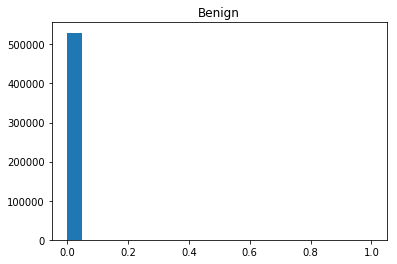

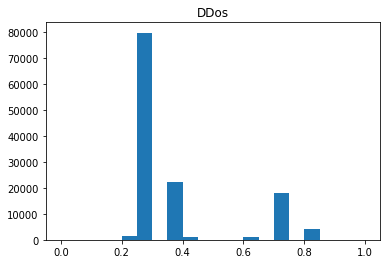

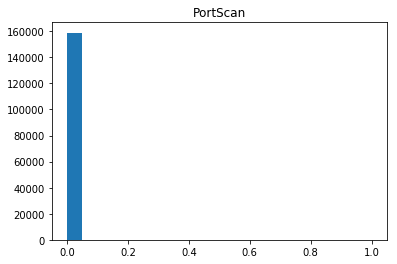

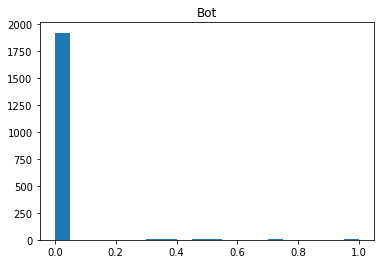

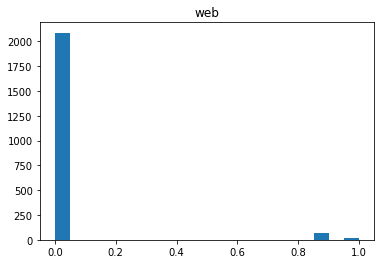

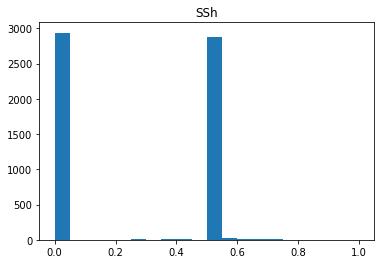

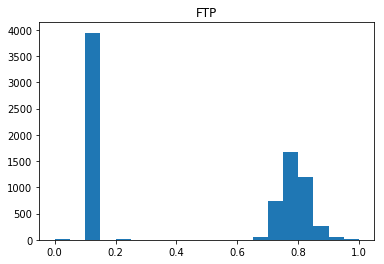

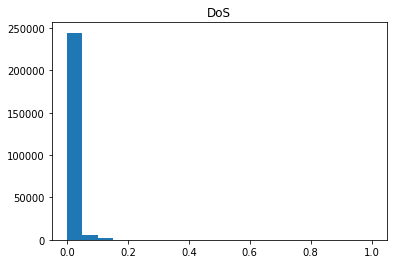

第2个属性的分布


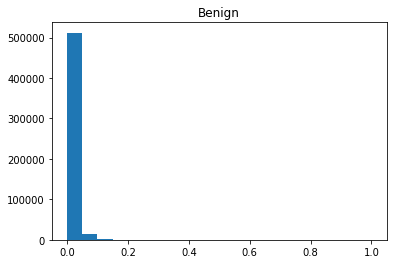

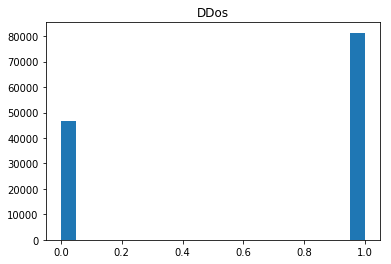

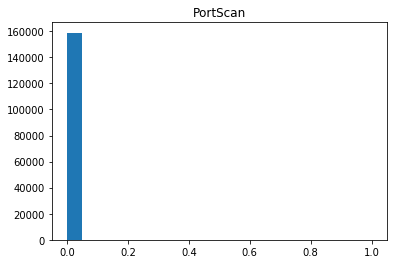

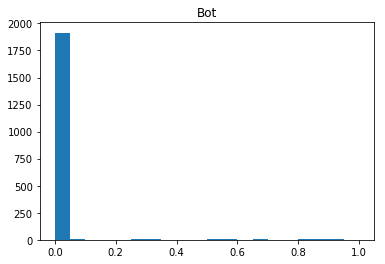

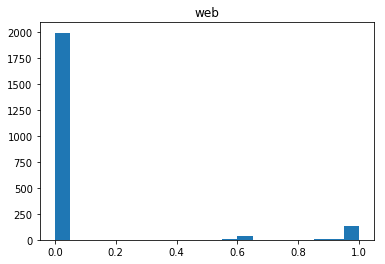

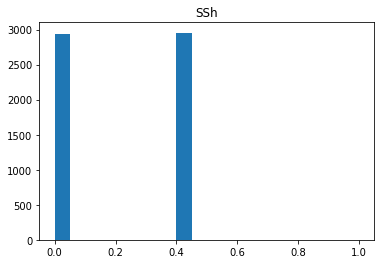

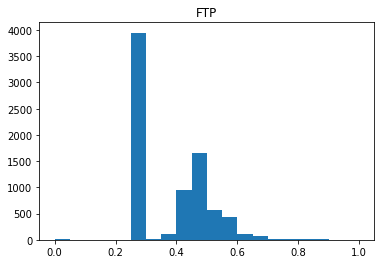

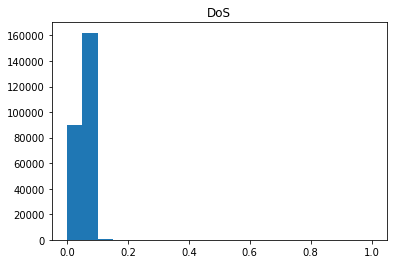

第3个属性的分布


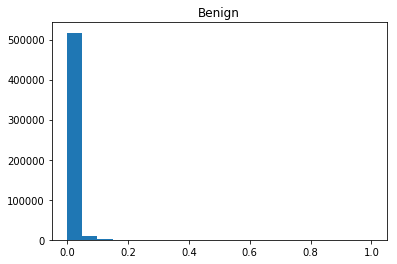

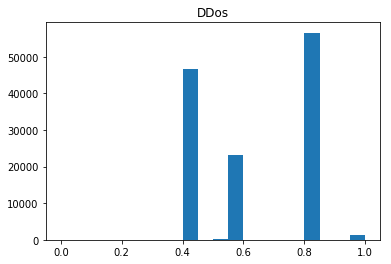

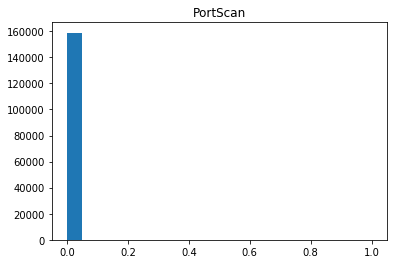

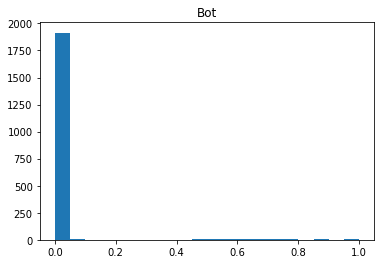

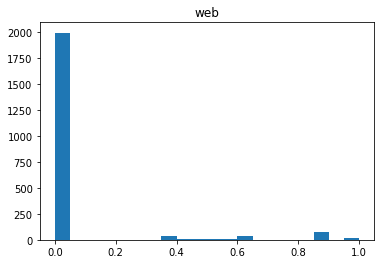

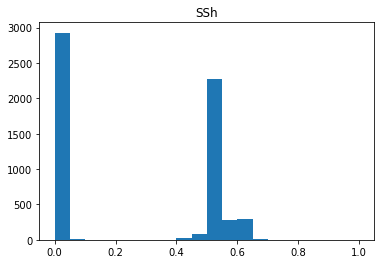

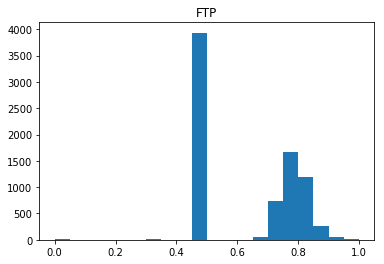

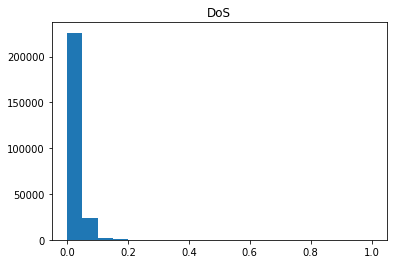

第4个属性的分布


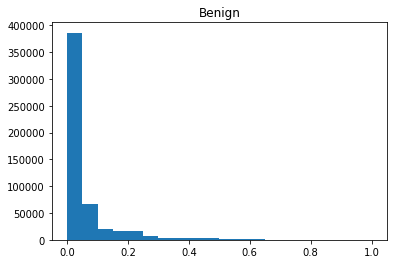

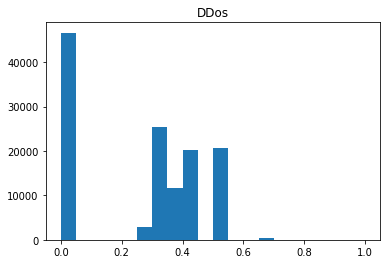

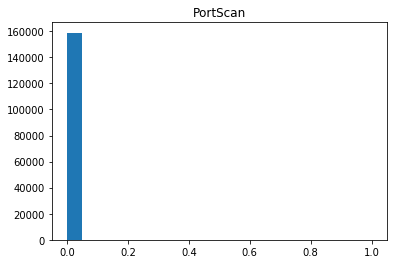

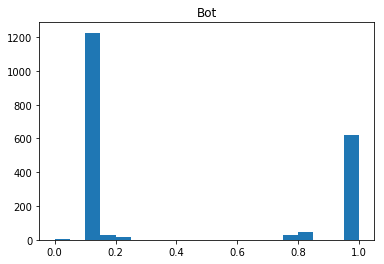

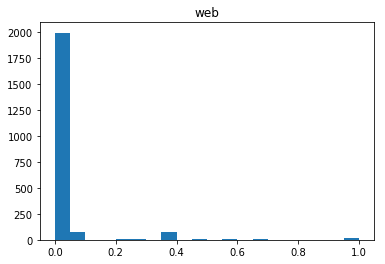

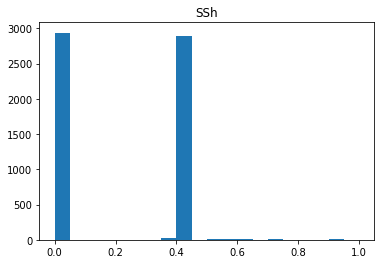

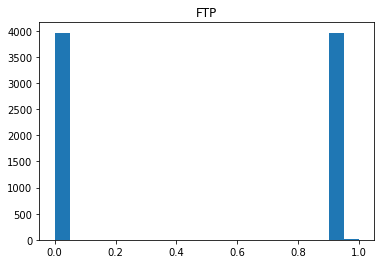

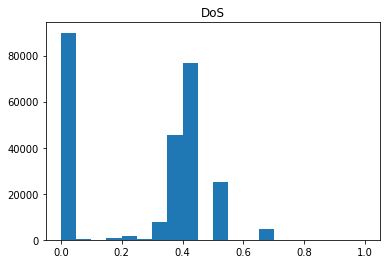

第5个属性的分布


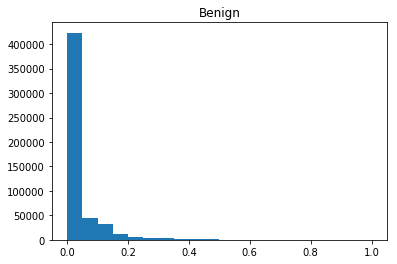

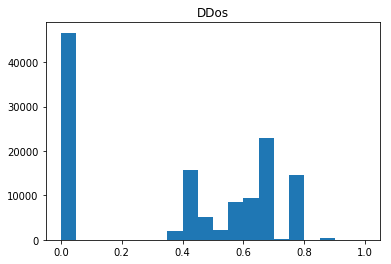

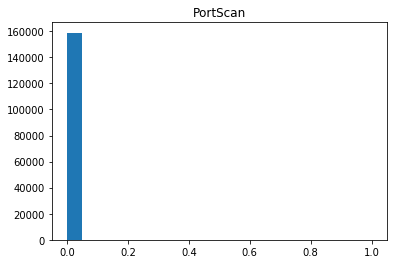

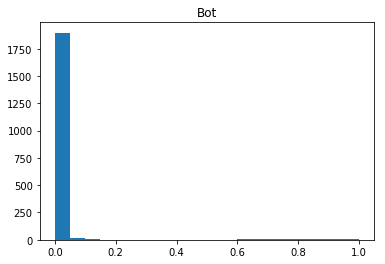

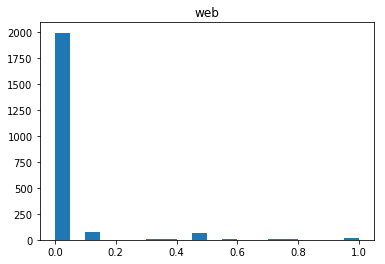

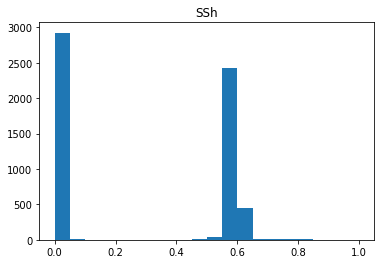

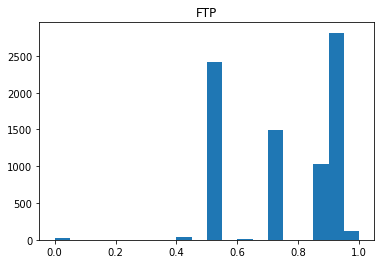

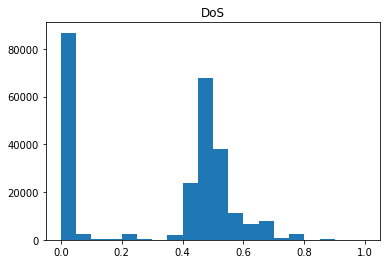

第6个属性的分布


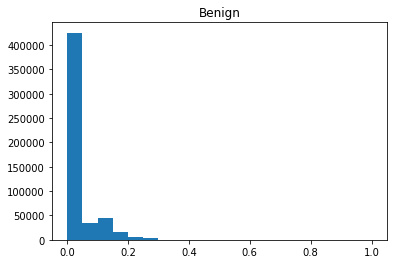

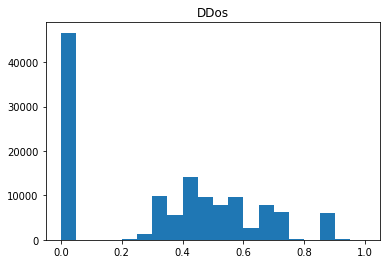

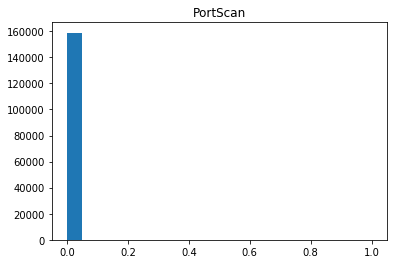

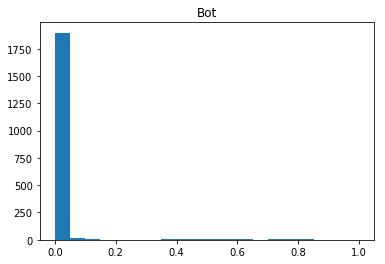

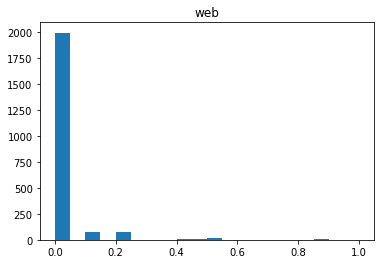

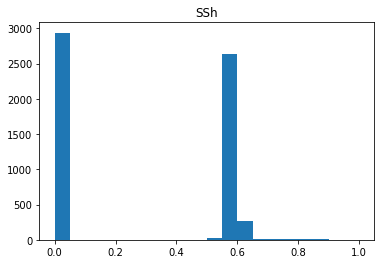

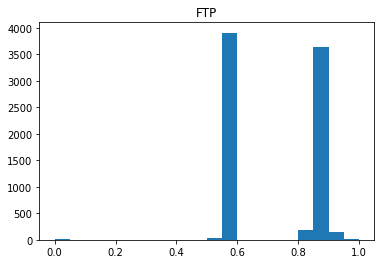

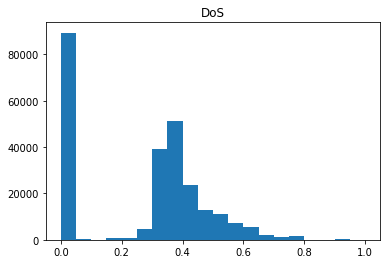

第7个属性的分布


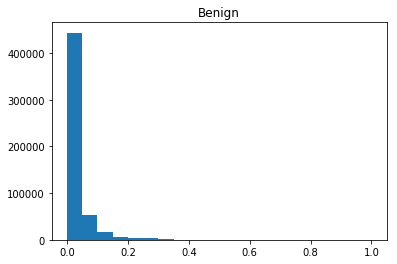

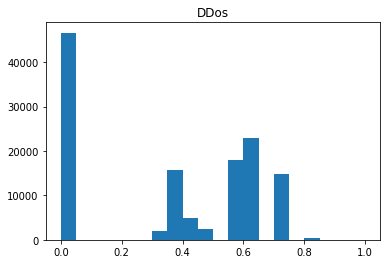

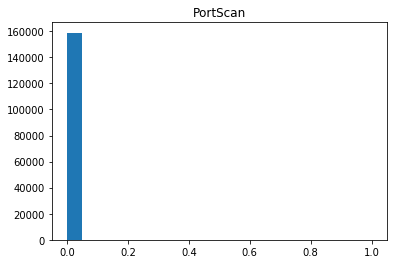

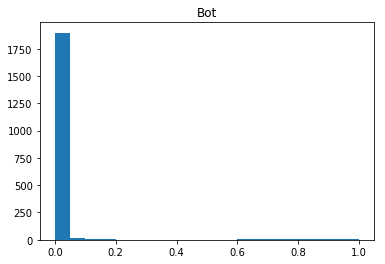

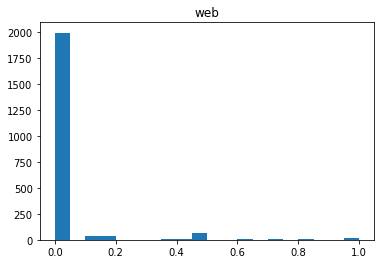

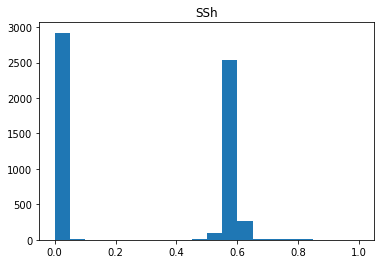

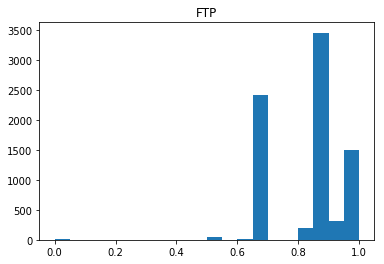

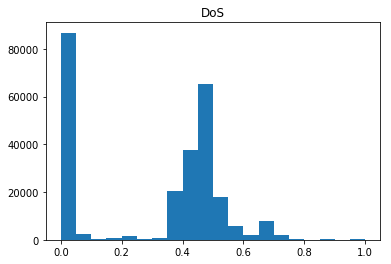

第8个属性的分布


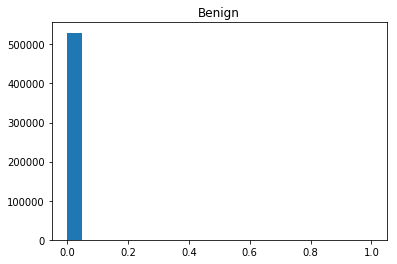

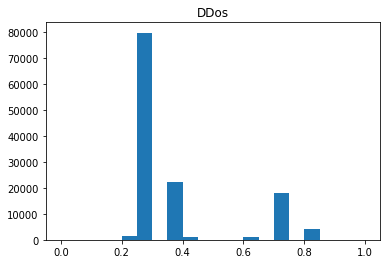

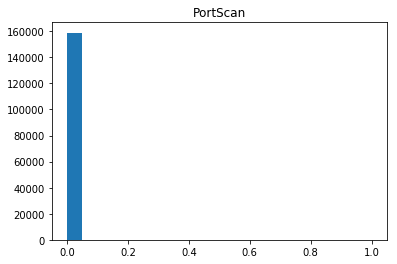

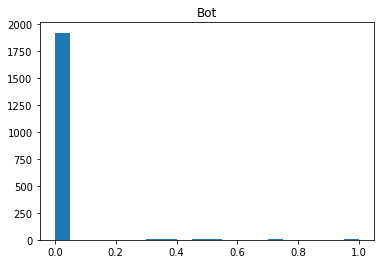

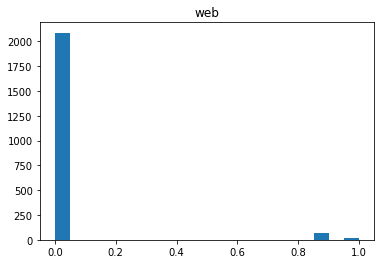

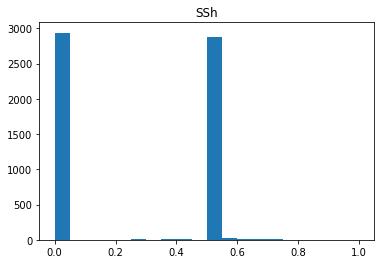

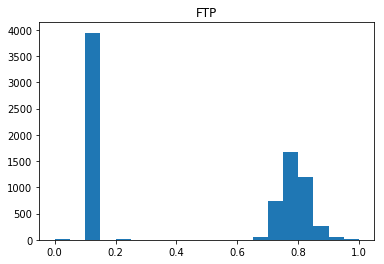

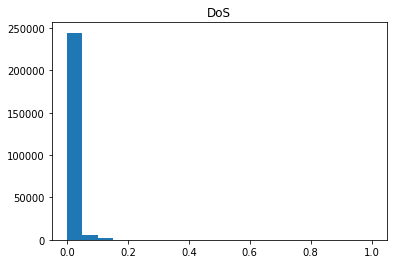

第9个属性的分布


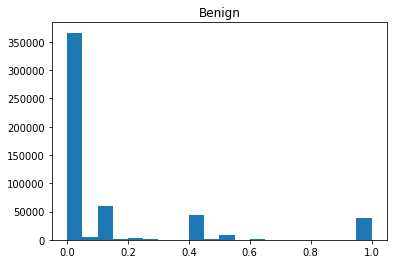

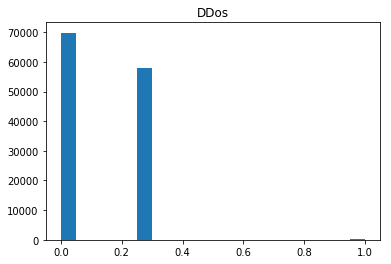

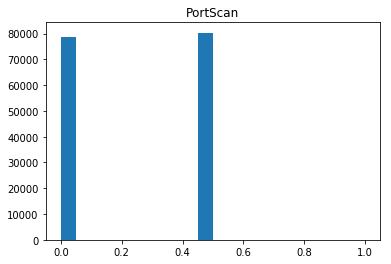

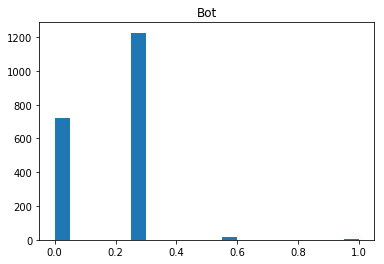

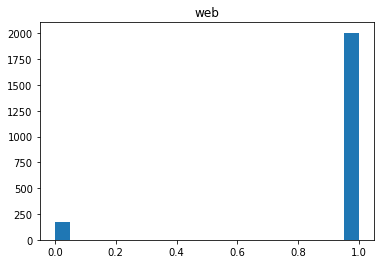

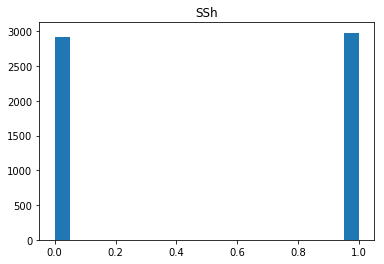

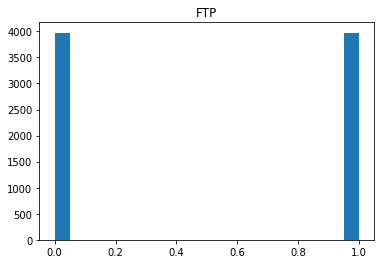

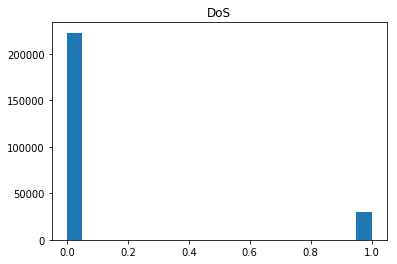

第10个属性的分布


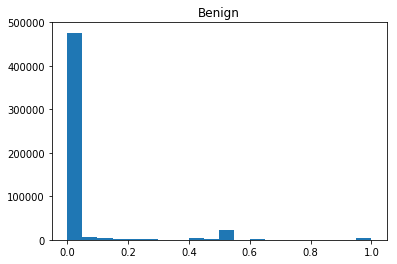

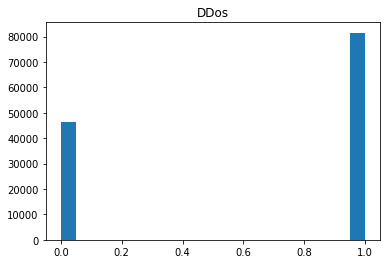

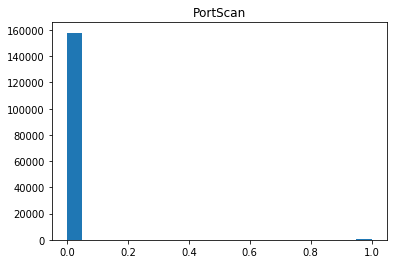

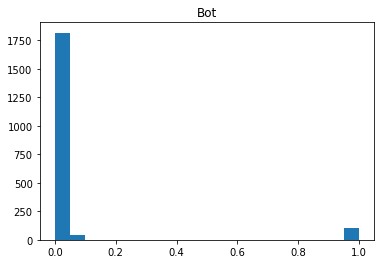

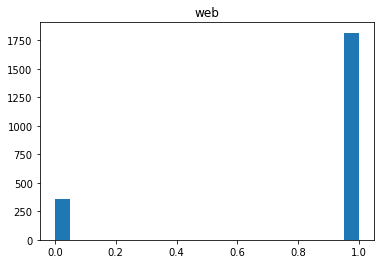

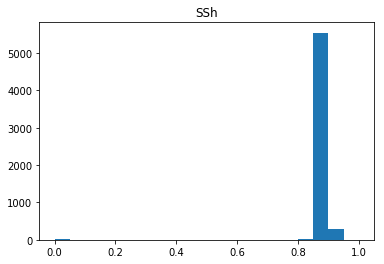

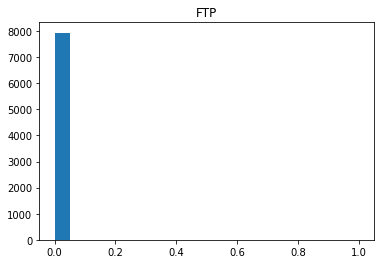

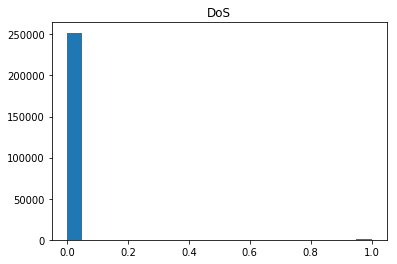

In [20]:

for i in range(feature_numbers):
    print("第{}个属性的分布".format(i+1))
    plt.title("Benign")
    plt.hist(BenignMatrix[:,i],20)
    plt.show()
    plt.title("DDos")
    plt.hist(DDosMatrix[:,i],20)
    plt.show()
    plt.title("PortScan")
    plt.hist(PortScanMatrix[:,i],20)
    plt.show()
    plt.title("Bot")
    plt.hist(BotMatrix[:,i],20)
    plt.show()
    plt.title("web")
    plt.hist(WebMatrix[:,i],20)
    plt.show()
    plt.title("SSh")
    plt.hist(SSHMatrix[:,i],20)
    plt.show()
    plt.title("FTP")
    plt.hist(FTPMatrix[:,i],20)
    plt.show()
    plt.title("DoS")
    plt.hist(DoSMatrix[:,i],20)
    plt.show()
    

    

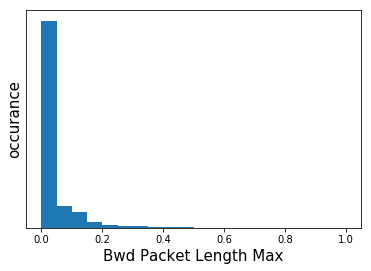

In [25]:
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 15,
}

plt.hist(BenignMatrix[:,4],20)
plt.ylabel('occurance', font2)
plt.xlabel("Bwd Packet Length Max", font2)
plt.ylabel('occurance', font2)
plt.yticks([])
#plt.xlim(0, 1)
plt.savefig("3_Packet_Length_Mean_Benign_Distribution.eps",format="eps")
#plt.show()

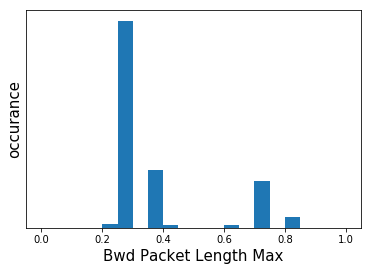

In [26]:
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 15,
}

plt.hist(DDosMatrix[:,0],20)
plt.ylabel('occurance', font2)
plt.xlabel("Bwd Packet Length Max", font2)
plt.ylabel('occurance', font2)
plt.yticks([])
#plt.xlim(0, 1)
plt.savefig("3_Packet_Length_Mean_DDoS_Distribution.eps",format="eps")
#plt.show()

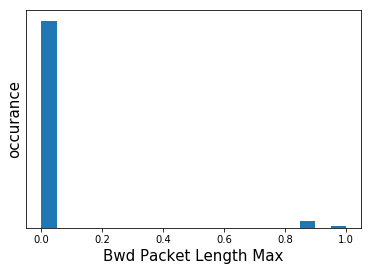

In [27]:
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 15,
}

plt.hist(WebMatrix[:,0],20)
plt.ylabel('occurance', font2)
plt.xlabel("Bwd Packet Length Max", font2)
plt.ylabel('occurance', font2)
plt.yticks([])
#plt.xlim(0, 1)
plt.savefig("3_Packet_Length_Mean_Web_Distribution.eps",format="eps")
#plt.show()

In [28]:
#定义difference weight,取值0~1
def calculate_dw(distribution_1, distribution_2, feature_index):
    count1 = calculate_count(distribution_1, feature_index)
    count2 = calculate_count(distribution_2, feature_index)
    h = 20
    dw = 0
    for i in range(h):
        start = i*5
        end = start + 5
        T1 = distribution_1[str(feature_index)][str(start) + '-' + str(end)]/count1
        T2 = distribution_2[str(feature_index)][str(start) + '-' + str(end)]/count2
        dw += abs(T1 - T2)
    return dw/2
#用于计算分布字典里的实例数
def calculate_count(distribution, feature_index):
    h = 20
    count = 0
    for i in range(h):
        start = i*5
        end = start + 5
        count += distribution[str(feature_index)][str(start) + '-' + str(end)]
    return count

In [35]:
#在属性2下，PortScan与Benign的dw 与 DDoS与Benign的dw 有很大区别
print(calculate_dw(Benign_Distribution_set, DDoS_Distribution_set, 4))
print(calculate_dw(Benign_Distribution_set, Web_Distribution_set, 4))

0.6246163171608077
0.15843402838718126
